In [47]:
# General
from os import path
from random import randrange

from sklearn.model_selection import train_test_split, GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, make_scorer
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import pickle
import joblib

from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

## TRAIN SET

In [20]:
trainDataFull = pd.read_csv("trainData.csv")
trainDataFull.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4,9
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2,6
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0,3


In [21]:
trainDataFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 104 entries, v1 to target
dtypes: float64(103), int64(1)
memory usage: 49.1 MB


In [22]:
trainDataFull.describe()

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.077721,0.030062,0.194955,0.561411,0.157148,0.510892,0.339339,0.060755,0.133253,0.528776,...,0.052726,0.316979,0.042697,0.290546,0.617066,0.304186,0.430156,0.837012,0.279162,4.842335
std,0.515539,0.328176,0.737317,1.003366,0.479018,0.786976,0.632642,0.385161,0.639593,0.925803,...,0.151387,0.515414,0.208958,0.742261,0.928514,0.923758,0.804039,1.204724,0.692345,2.510794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.200000,0.400000,0.000000,5.000000
75%,0.000000,0.000000,0.200000,0.600000,0.200000,0.600000,0.400000,0.000000,0.000000,0.600000,...,0.000000,0.400000,0.000000,0.200000,0.800000,0.200000,0.400000,1.000000,0.200000,7.000000
max,19.400000,17.400000,17.000000,15.200000,13.400000,15.200000,6.600000,12.400000,21.000000,52.600000,...,4.400000,9.800000,9.600000,20.000000,16.600000,15.200000,17.400000,53.200000,18.200000,9.000000


In [23]:
trainData = trainDataFull.loc[:,'v1':'v99']
trainData.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.2,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0


In [24]:
trainLabels = trainDataFull.loc[:,'target']
trainLabels.unique()

array([9, 6, 3, 4, 2, 8, 7, 1, 5])

In [25]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(trainLabels)
label_encoded_y = label_encoder.transform(trainLabels)
label_encoded_y

array([8, 5, 2, ..., 7, 4, 2])

## Normalize

In [26]:
# scaler = StandardScaler()

In [27]:
# scaler.fit(trainData.values)

In [28]:
# scaler.mean_

In [29]:
# normalized_standart = scaler.transform(trainData)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(trainData.values, 
                                                    label_encoded_y, 
                                                    test_size = 0.3, 
                                                    random_state = 33,
                                                    shuffle = True,
                                                    stratify = label_encoded_y)

## MODEL-2 (Random Forest Classifier)

In [66]:
clf = DecisionTreeClassifier(random_state=0,max_depth=512)
clf

DecisionTreeClassifier(max_depth=512, random_state=0)

In [67]:
y_train

array([1, 5, 5, ..., 2, 2, 2])

In [68]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=512, random_state=0)

In [69]:
# make predictions for test data
y_pred = clf.predict(X_test)
y_pred

array([2, 3, 8, ..., 5, 1, 1])

In [70]:
predictions = [round(value) for value in y_pred]

In [71]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.25%


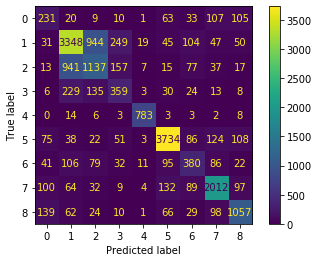

In [72]:
#fig = plt.figure(figsize=(10,10))
plot_confusion_matrix(clf,
                     X_test,
                     y_test,
                     values_format='d')

## Save Valid Score

In [ ]:
y_score = RFC_model.predict_proba(X_test)
y_score[0]

In [ ]:
valid_score = pd.DataFrame(y_score, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
valid_score

In [ ]:
valid_score.to_csv('./results/valid-submission-RFC-standart-norm-3.csv', index = False)

## Save & Load Model

## joblib

In [ ]:
# Save the model as a pickle in a file 
joblib.dump(RFC_model, './model/model_RFC-standart-norm-3.pkl') 
  
# Load the model from the file 
RFC_model_from_joblib = joblib.load('./model/model_RFC-standart-norm-3.pkl')  
  
# Use the loaded model to make predictions 
RFC_model_predictions = RFC_model_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, RFC_model_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## GridSearchCV 

In [ ]:
clf = GridSearchCV(RFC_model_model,
                   {'max_depth': [4, 6],
                    'n_estimators': [100, 200]}, 
                    verbose=1,
                   cv=2)
clf.fit(X_train, 
        y_train, 
        early_stopping_rounds=10,
        eval_metric='mlogloss',
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=True)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
# Save the model as a pickle in a file 
joblib.dump(clf.best_estimator_, './model/clf.pkl')

# Load the model from the file 
clf_from_joblib = joblib.load('./model/clf.pkl')  

# Use the loaded model to make predictions 
clf_predictions = clf_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, clf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# TEST

In [ ]:
testData = pd.read_csv("testData.csv")
testData

In [ ]:
test_normalized_standart = scaler.transform(testData.values)
test_normalized_standart

In [ ]:
# Use the loaded model to make predictions 
# test_predictions = RFC_model.predict(test_normalized_standart)
# test_predictions

In [ ]:
# Use the loaded model to make predictions probability
test_predictions = RFC_model.predict_proba(test_normalized_standart)
test_predictions

In [ ]:
result = pd.DataFrame(test_predictions, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
result

In [ ]:
result.to_csv('./results/test-submission-RFC-standart-norm-3.csv', index = False)

## REFERENCES

1- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

2- https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

3- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

4- https://www.datacamp.com/community/tutorials/xgboost-in-python

5- https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

6- https://www.datacamp.com/community/tutorials/random-forests-classifier-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1012782&gclid=EAIaIQobChMI49HTjNO06wIVB-ztCh23nwMLEAAYASAAEgKKEvD_BwE